In [ ]:
##This is the 6th lab Report Assignment about Unsupervised Learning Using K-Means Clustering on California Housing Data
#Note: #There are many additional code for checking or comparing

In [ ]:
##Step 1: Load the California Housing Dataset and Preprocess Data

In [2]:
# Step 1: Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2: Load the California Housing Dataset
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame

# Step 3: Select the features 'longitude', 'latitude', and 'median_income'
data = df[['Longitude', 'Latitude', 'MedInc']]

# Step 4: Standardize the data (K-Means performs better on normalized data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Preview the data
print(data.head())


   Longitude  Latitude  MedInc
0    -122.23     37.88  8.3252
1    -122.22     37.86  8.3014
2    -122.24     37.85  7.2574
3    -122.25     37.85  5.6431
4    -122.25     37.85  3.8462


In [ ]:
##Step 2: Apply K-Means Clustering, plot Silhouette Scores for different k values

C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=2, the silhouette score is: 0.5482253273989484


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=3, the silhouette score is: 0.5177273144600426


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=4, the silhouette score is: 0.4350793985198938


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=5, the silhouette score is: 0.3869631777718812


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=6, the silhouette score is: 0.3984653534071962


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=7, the silhouette score is: 0.37047384460028376


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=8, the silhouette score is: 0.35251857347512683


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=9, the silhouette score is: 0.3561535814584722


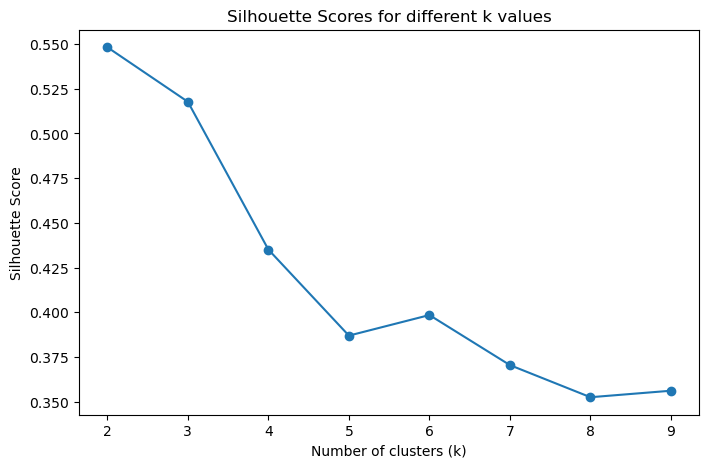

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Set a range of 'k' values to try
k_values = range(2, 10)
silhouette_scores = []

# Step 2: Iterate over different values of k to find the optimal number of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    # Calculate silhouette score for each 'k'
    score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(score)
    print(f'For k={k}, the silhouette score is: {score}')

# Step 3: Plot the silhouette scores to determine the best k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for different k values')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
##Step 3: Visualizing the Clusters, Scatter Plot

C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp omen 4 pro\AppData\Local\Temp\ipykernel_25580\1030322905.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = cluster_labels


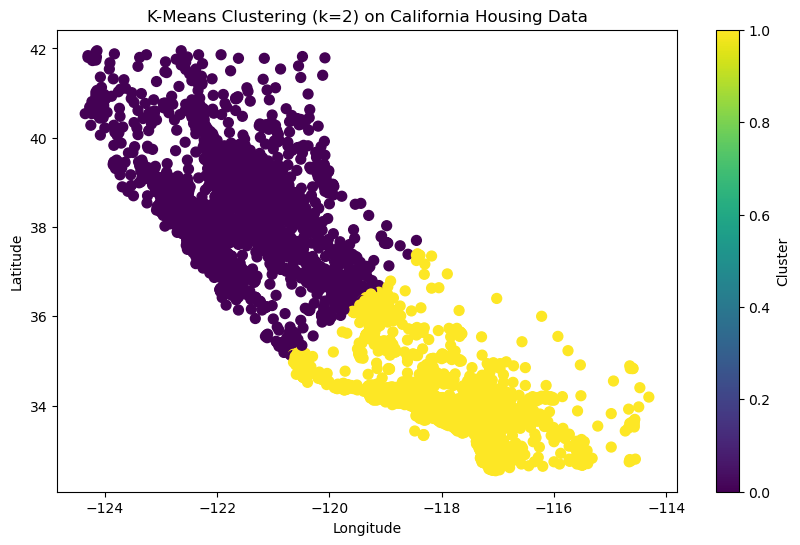

In [4]:
# Step 1: Apply K-Means clustering with the best k (k=2)
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Step 2: Add cluster labels to the original data (before scaling) for visualization
data['Cluster'] = cluster_labels

# Step 3: Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title(f'K-Means Clustering (k={best_k}) on California Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
##Step 4: Cluster Analysis, plot Histogram

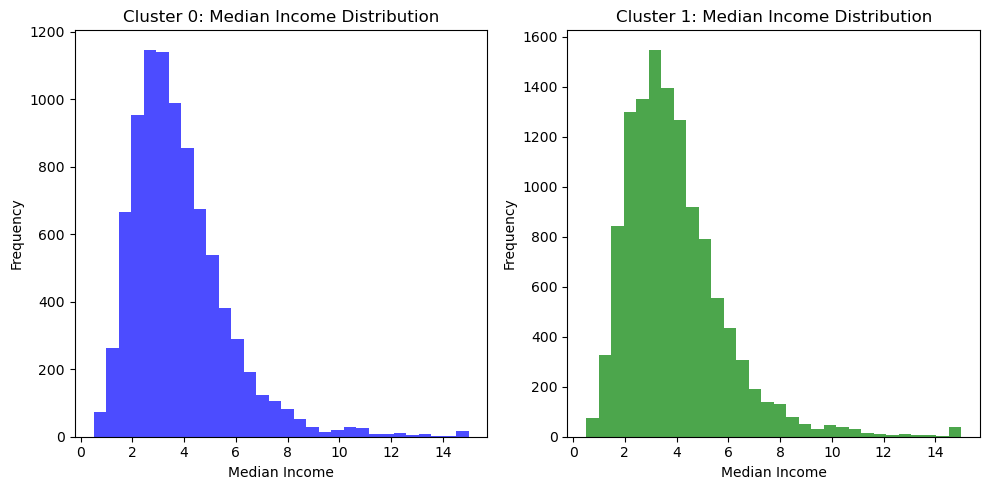

Cluster 0 Income Stats:
 count    8704.000000
mean        3.799498
std         1.859418
min         0.499900
25%         2.531300
50%         3.461450
75%         4.665725
max        15.000100
Name: MedInc, dtype: float64

Cluster 1 Income Stats:
 count    11936.000000
mean         3.922572
std          1.927172
min          0.499900
25%          2.592925
50%          3.588450
75%          4.812500
max         15.000100
Name: MedInc, dtype: float64


In [5]:
# Step 1: Analyze the distribution of median income in each cluster
cluster_0_income = data[data['Cluster'] == 0]['MedInc']
cluster_1_income = data[data['Cluster'] == 1]['MedInc']

# Step 2: Plot histogram for median income in each cluster
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(cluster_0_income, bins=30, color='blue', alpha=0.7)
plt.title('Cluster 0: Median Income Distribution')
plt.xlabel('Median Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(cluster_1_income, bins=30, color='green', alpha=0.7)
plt.title('Cluster 1: Median Income Distribution')
plt.xlabel('Median Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 3: Calculate basic statistics for each cluster
cluster_0_stats = cluster_0_income.describe()
cluster_1_stats = cluster_1_income.describe()

print("Cluster 0 Income Stats:\n", cluster_0_stats)
print("\nCluster 1 Income Stats:\n", cluster_1_stats)


In [ ]:
##comparsion DBSCAN vs. K-Means

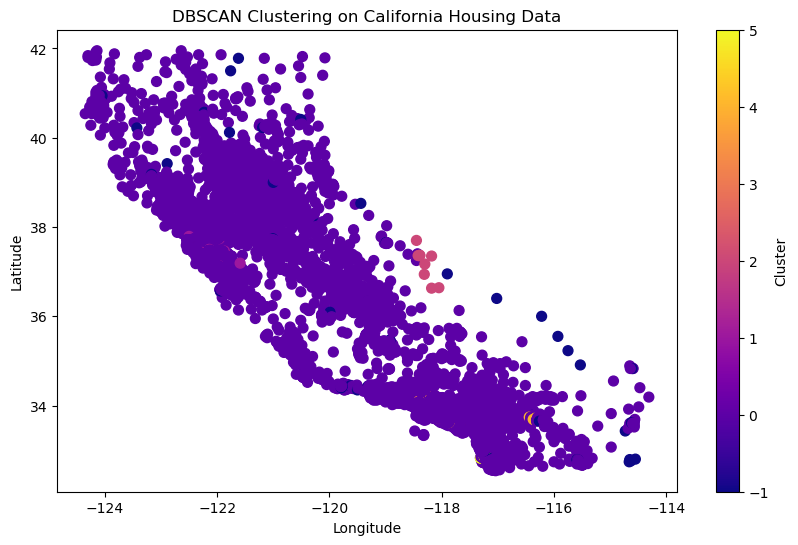

Number of clusters found by DBSCAN: 6


In [6]:
from sklearn.cluster import DBSCAN

# Step 1: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Step 2: Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=dbscan_labels, cmap='plasma', s=50)
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering on California Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Count unique clusters (DBSCAN assigns -1 for noise)
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {unique_clusters}")


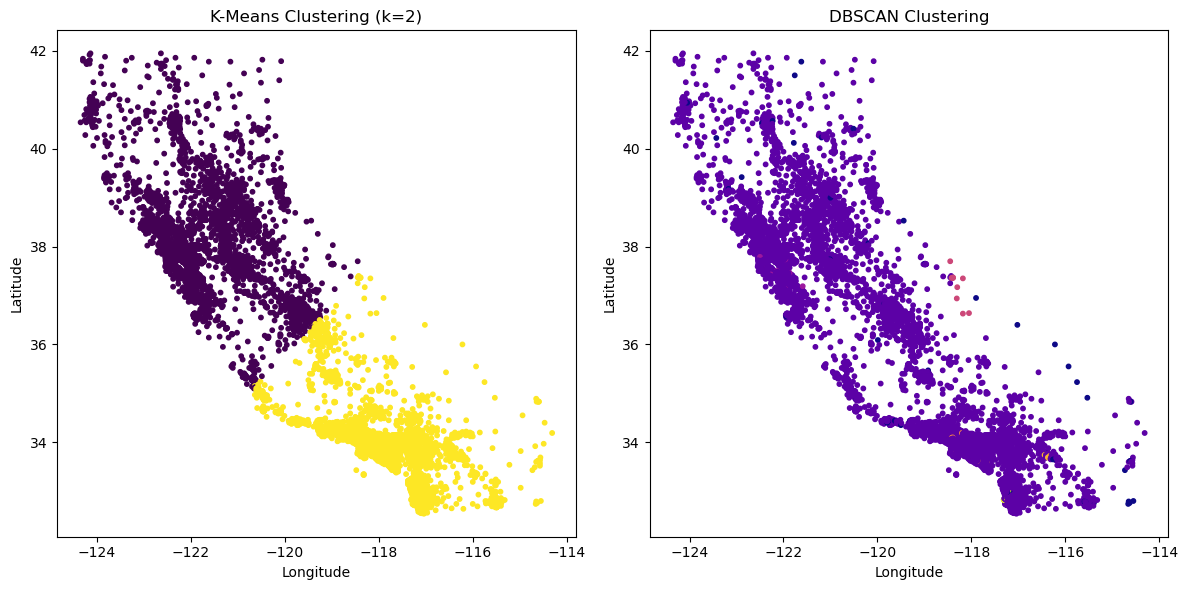

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# K-Means plot
axs[0].scatter(data['Longitude'], data['Latitude'], c=cluster_labels, cmap='viridis', s=10)
axs[0].set_title('K-Means Clustering (k=2)')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# DBSCAN plot
axs[1].scatter(data['Longitude'], data['Latitude'], c=dbscan_labels, cmap='plasma', s=10)
axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

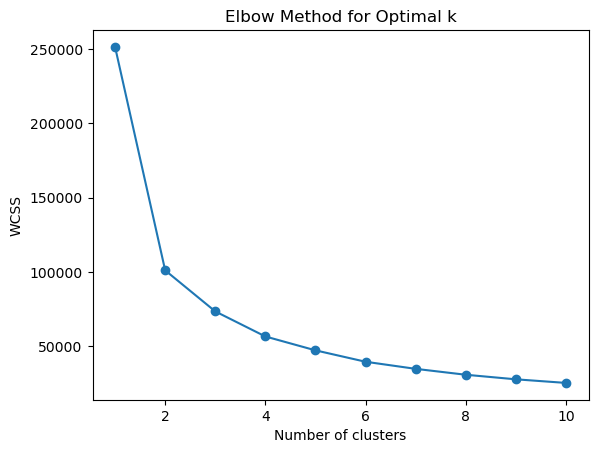

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Longitude', 'Latitude', 'MedInc']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp omen 4 pro\AppData\Local\Temp\ipykernel_25580\2600102096.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = cluster_labels


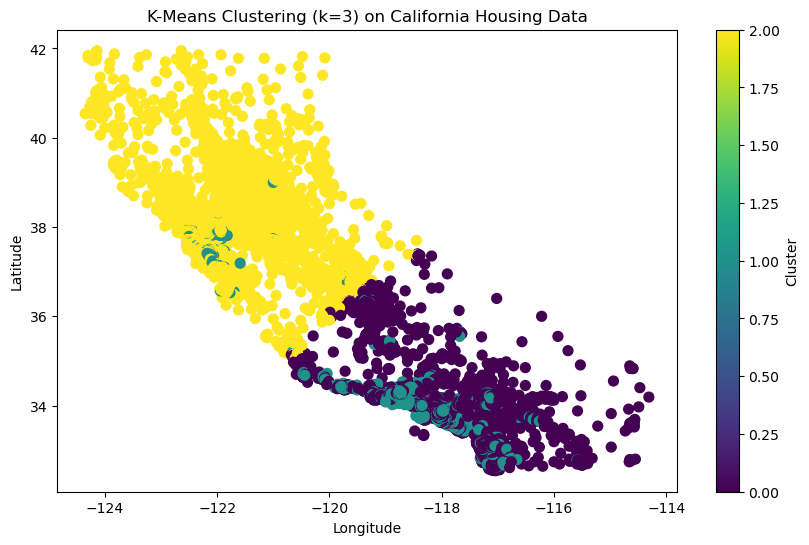

In [22]:
# Step 1: Apply K-Means clustering with the best k (k=3)
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Step 2: Add cluster labels to the original data (before scaling) for visualization
data['Cluster'] = cluster_labels

# Step 3: Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title(f'K-Means Clustering (k={best_k}) on California Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


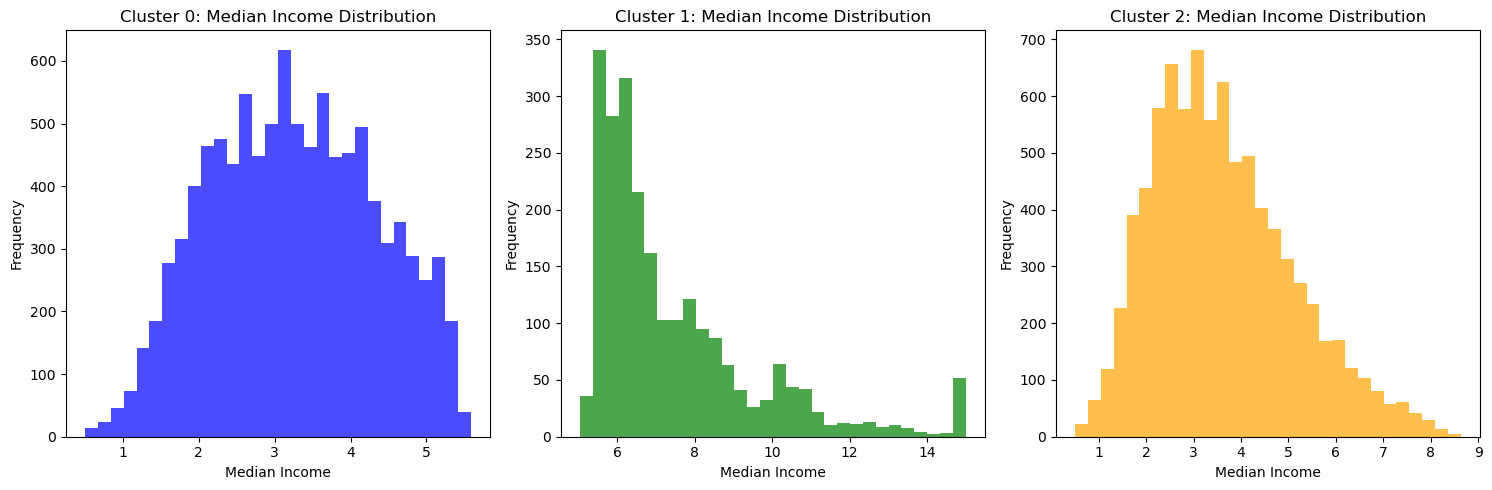

Cluster 0 Income Stats:
 count    9951.000000
mean        3.249321
std         1.088402
min         0.499900
25%         2.388200
50%         3.212500
75%         4.089300
max         5.584200
Name: MedInc, dtype: float64

Cluster 1 Income Stats:
 count    2331.000000
mean        7.433388
std         2.121278
min         5.038000
25%         5.950300
50%         6.636900
75%         8.242000
max        15.000100
Name: MedInc, dtype: float64

Cluster 2 Income Stats:
 count    8358.000000
mean        3.616826
std         1.477914
min         0.499900
25%         2.519500
50%         3.405700
75%         4.533600
max         8.634000
Name: MedInc, dtype: float64


In [28]:
import matplotlib.pyplot as plt

# Step 1: Analyze the distribution of median income in each cluster
cluster_0_income = data[data['Cluster'] == 0]['MedInc']
cluster_1_income = data[data['Cluster'] == 1]['MedInc']
cluster_2_income = data[data['Cluster'] == 2]['MedInc']

# Step 2: Plot histogram for median income in each cluster
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)  # Changed to 1, 3 for three subplots
plt.hist(cluster_0_income, bins=30, color='blue', alpha=0.7)
plt.title('Cluster 0: Median Income Distribution')
plt.xlabel('Median Income')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)  # Changed to 1, 3 for three subplots
plt.hist(cluster_1_income, bins=30, color='green', alpha=0.7)
plt.title('Cluster 1: Median Income Distribution')
plt.xlabel('Median Income')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)  # Changed to 1, 3 for three subplots
plt.hist(cluster_2_income, bins=30, color='orange', alpha=0.7)
plt.title('Cluster 2: Median Income Distribution')
plt.xlabel('Median Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 3: Calculate basic statistics for each cluster
cluster_0_stats = cluster_0_income.describe()
cluster_1_stats = cluster_1_income.describe()
cluster_2_stats = cluster_2_income.describe()

print("Cluster 0 Income Stats:\n", cluster_0_stats)
print("\nCluster 1 Income Stats:\n", cluster_1_stats)
print("\nCluster 2 Income Stats:\n", cluster_2_stats)


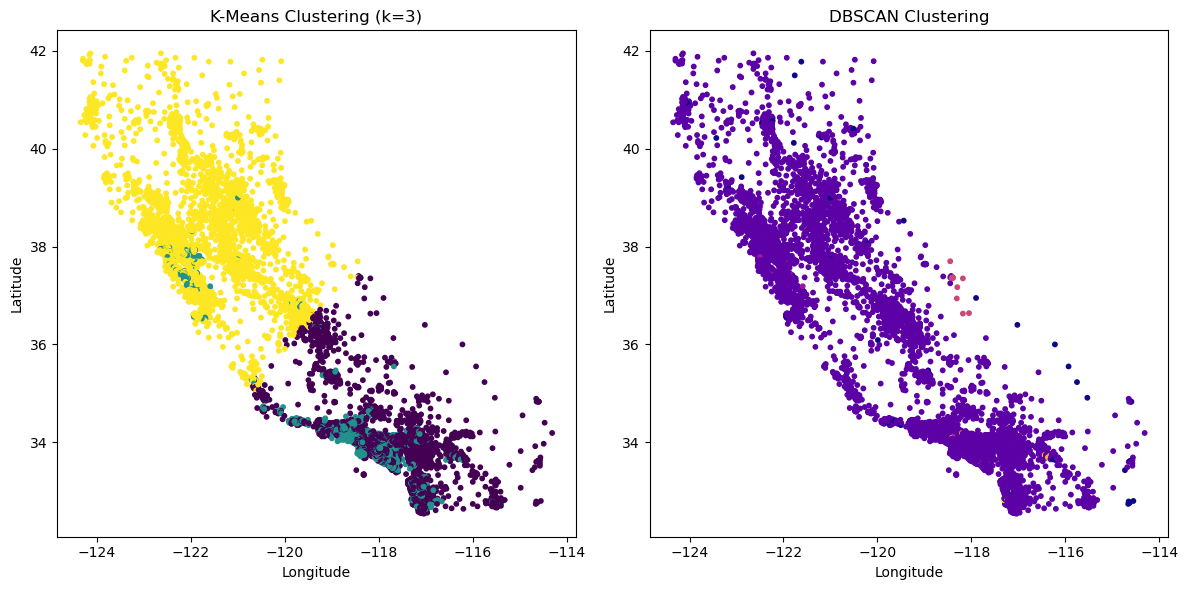

In [29]:
import matplotlib.pyplot as plt

# Assuming you have cluster_labels from K-Means and dbscan_labels from DBSCAN
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# K-Means plot
axs[0].scatter(data['Longitude'], data['Latitude'], c=cluster_labels, cmap='viridis', s=10)
axs[0].set_title('K-Means Clustering (k=3)')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# DBSCAN plot
axs[1].scatter(data['Longitude'], data['Latitude'], c=dbscan_labels, cmap='plasma', s=10)
axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()


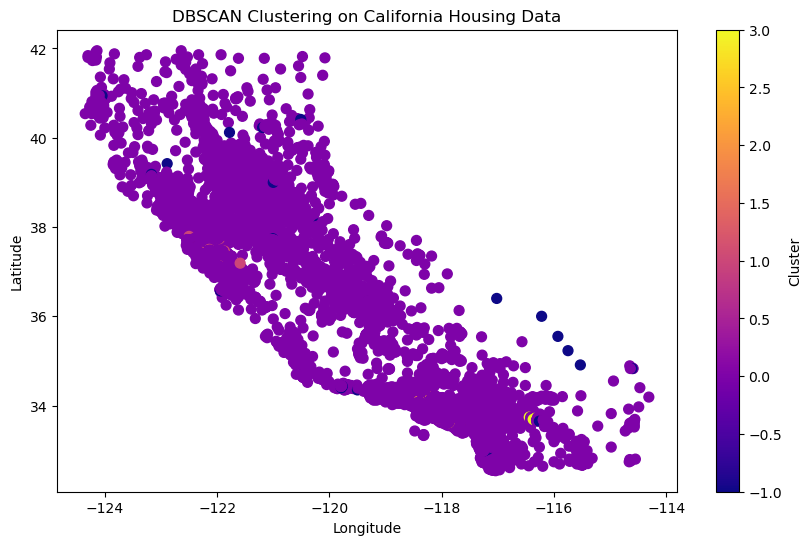

Number of clusters found by DBSCAN: 4


In [38]:
from sklearn.cluster import DBSCAN

# Step 1: Apply DBSCAN
dbscan = DBSCAN(eps=0.36, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Step 2: Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=dbscan_labels, cmap='plasma', s=50)
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering on California Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Count unique clusters (DBSCAN assigns -1 for noise)
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {unique_clusters}")


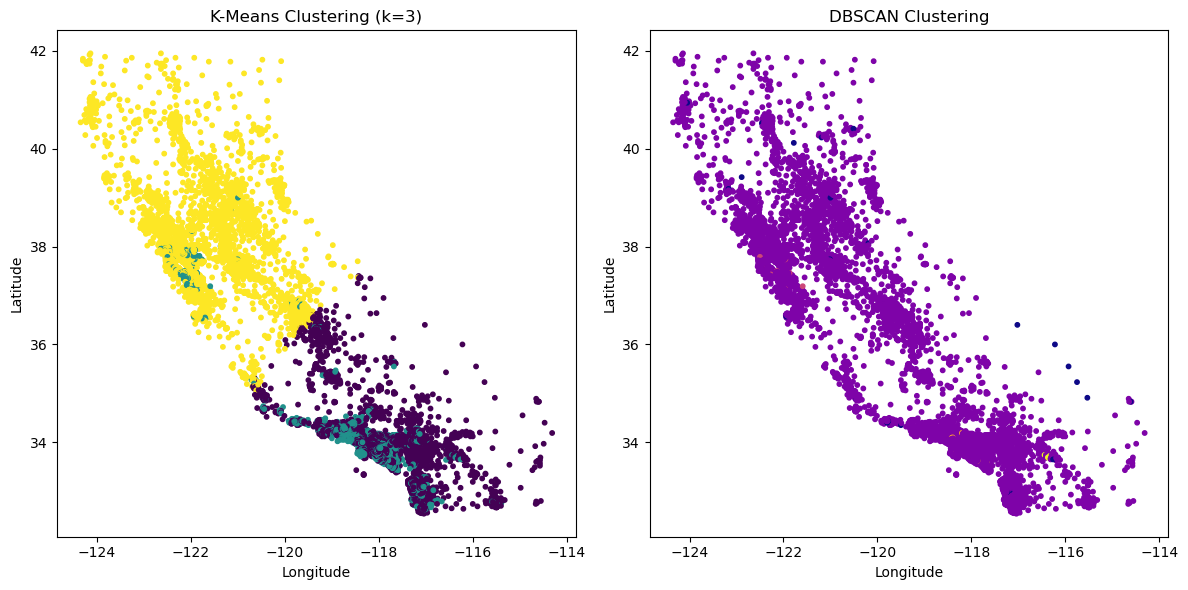

In [39]:
import matplotlib.pyplot as plt

# Assuming you have cluster_labels from K-Means and dbscan_labels from DBSCAN
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# K-Means plot
axs[0].scatter(data['Longitude'], data['Latitude'], c=cluster_labels, cmap='viridis', s=10)
axs[0].set_title('K-Means Clustering (k=3)')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# DBSCAN plot
axs[1].scatter(data['Longitude'], data['Latitude'], c=dbscan_labels, cmap='plasma', s=10)
axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()